<a href="https://colab.research.google.com/github/Dmitry0722/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import files

In [ ]:
object_columns = []

In [ ]:
uploaded = files.upload()
df = pd.read_csv('cbb.csv')

Saving cbb.csv to cbb.csv


In [ ]:
print(df.select_dtypes(include='float').columns.tolist())
print(df.select_dtypes(include='int').columns.tolist())
df.select_dtypes(include='object').columns.tolist()

['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'SEED']
['G', 'W', 'YEAR']


['TEAM', 'CONF', 'POSTSEASON']

Корреляция между отдельными столбцами

In [ ]:

    # 1 - Связь между атакующей и защитной результативностью.
    corr, pval = pearsonr(df['ADJOE'], df['ADJDE'])
    print(f"Корреляция: {corr:.3f}, p-value: {pval:.3f}")

    # 2 - Темп игры (ADJ_T) влияет на количество побед
    corr, pval = pearsonr(df['ADJ_T'], df['W'])
    print(f"Корреляция: {corr:.3f}, p-value: {pval:.3f}")

    # 3 - Команды с высоким нападением (ADJOE) добиваются больших побед
    corr, pval = pearsonr(df['ADJOE'], df['W'])
    print(f"Корреляция: {corr:.3f}, p-value: {pval:.3f}")

    # 4 - Хорошая защита (ADJDE) помогает командам выигрывать
    corr, pval = pearsonr(df['3P_O'], df['W'])
    print(f"Корреляция: {corr:.3f}, p-value: {pval:.3f}")

    # 5 - Трёхочковые броски (3P_O) связаны с успешностью команды.
    #corr_3P_O_W = df['3P_O'].corr(df['W'])
    #print(f'Корреляция между трехочковыми бросками и количеством побед: ', corr_3P_O_W)


Корреляция: -0.494, p-value: 0.000
Корреляция: -0.025, p-value: 0.133
Корреляция: 0.737, p-value: 0.000
Корреляция: 0.552, p-value: 0.000


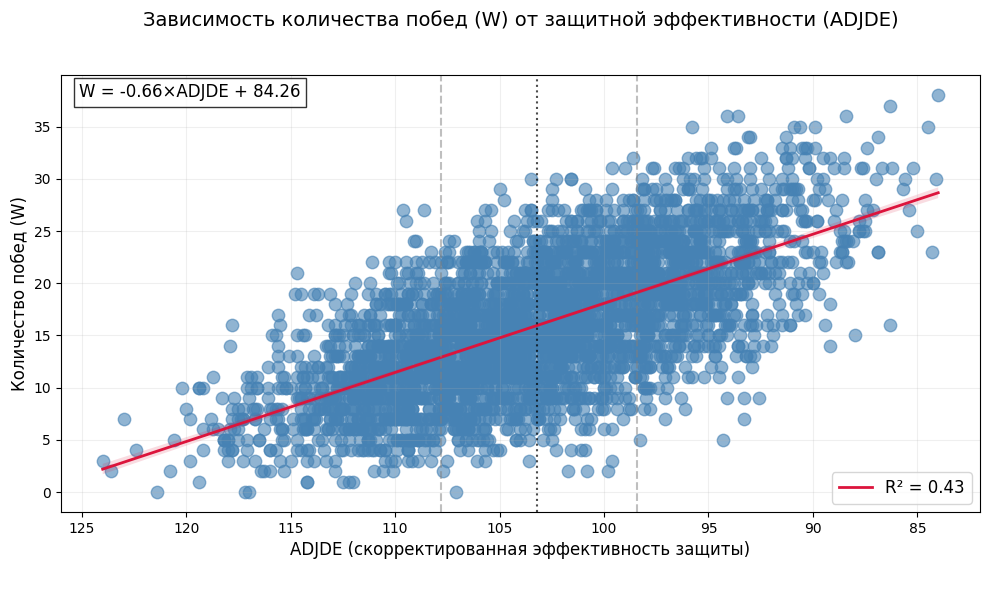

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# Расчет корреляции
corr, p_value = stats.pearsonr(df['ADJDE'], df['W'])

# Создание графики
plt.figure(figsize=(10, 6))

# Основной график с доверительным интервалом
ax = sns.regplot(data=df, x='ADJDE', y='W',
                 scatter_kws={'color': 'steelblue', 'alpha': 0.6, 's': 80},
                 line_kws={'color': 'crimson', 'lw': 2,
                          'label': f'R² = {corr**2:.2f}'},
                 ci=95)

# Инверсия оси X для интуитивного отображения (меньше ADJDE → лучше)
ax.invert_xaxis()

# Добавление уравнения регрессии
slope, intercept = np.polyfit(df['ADJDE'], df['W'], 1)
equation = f'W = {slope:.2f}×ADJDE + {intercept:.2f}'
plt.text(0.02, 0.95, equation, transform=ax.transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Настройка оформления
plt.title('Зависимость количества побед (W) от защитной эффективности (ADJDE)\n',
          fontsize=14, pad=20)
plt.xlabel('ADJDE (скорректированная эффективность защиты)\n', fontsize=12)
plt.ylabel('Количество побед (W)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.2)

# Выделение ключевых зон
plt.axvline(x=df['ADJDE'].quantile(0.25), color='grey', linestyle='--', alpha=0.5)
plt.axvline(x=df['ADJDE'].median(), color='black', linestyle=':', alpha=0.7)
plt.axvline(x=df['ADJDE'].quantile(0.75), color='grey', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



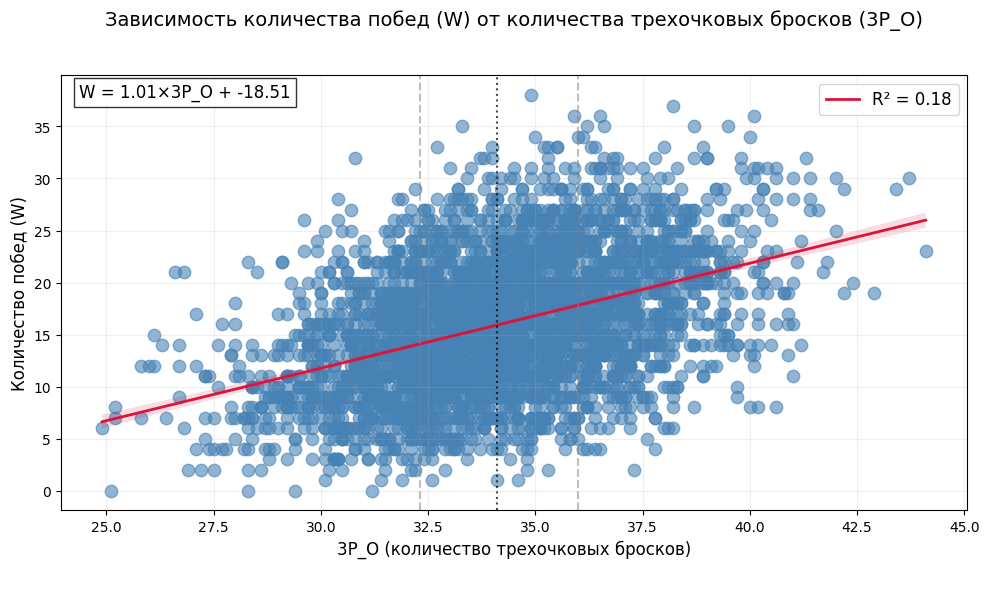

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# Расчет корреляции
corr, p_value = stats.pearsonr(df['3P_O'], df['W'])

# Создание графики
plt.figure(figsize=(10, 6))

# Основной график с доверительным интервалом
ax = sns.regplot(data=df, x='3P_O', y='W',
                 scatter_kws={'color': 'steelblue', 'alpha': 0.6, 's': 80},
                 line_kws={'color': 'crimson', 'lw': 2,
                          'label': f'R² = {corr**2:.2f}'},
                 ci=95)

# Инверсия оси X для интуитивного отображения (меньше ADJDE → лучше)
#ax.invert_xaxis()

# Добавление уравнения регрессии
slope, intercept = np.polyfit(df['3P_O'], df['W'], 1)
equation = f'W = {slope:.2f}×3P_O + {intercept:.2f}'
plt.text(0.02, 0.95, equation, transform=ax.transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Настройка оформления
plt.title('Зависимость количества побед (W) от количества трехочковых бросков (3P_O)\n',
          fontsize=14, pad=20)
plt.xlabel('3P_O (количество трехочковых бросков)\n', fontsize=12)
plt.ylabel('Количество побед (W)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.2)

# Выделение ключевых зон
plt.axvline(x=df['3P_O'].quantile(0.25), color='grey', linestyle='--', alpha=0.5)
plt.axvline(x=df['3P_O'].median(), color='black', linestyle=':', alpha=0.7)
plt.axvline(x=df['3P_O'].quantile(0.75), color='grey', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



Графики распределения

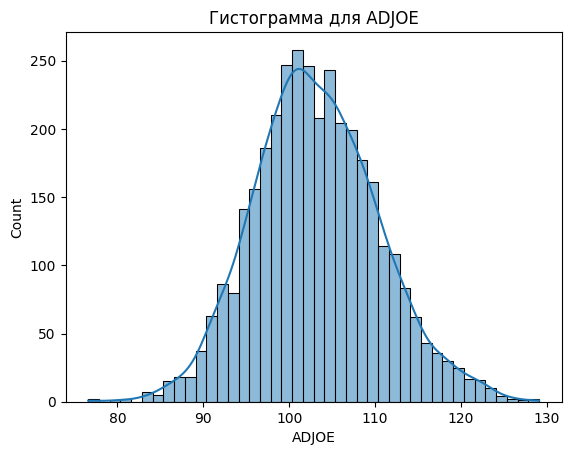

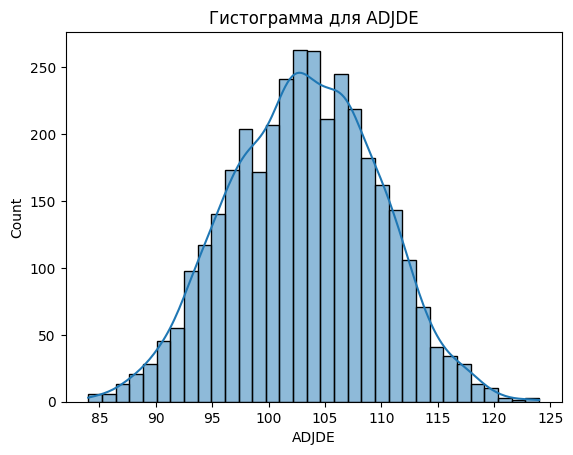

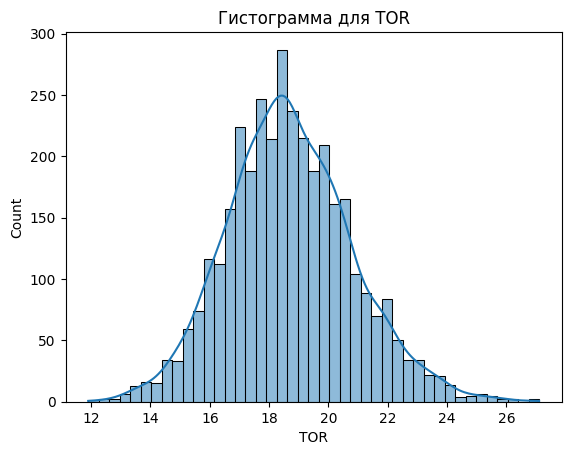

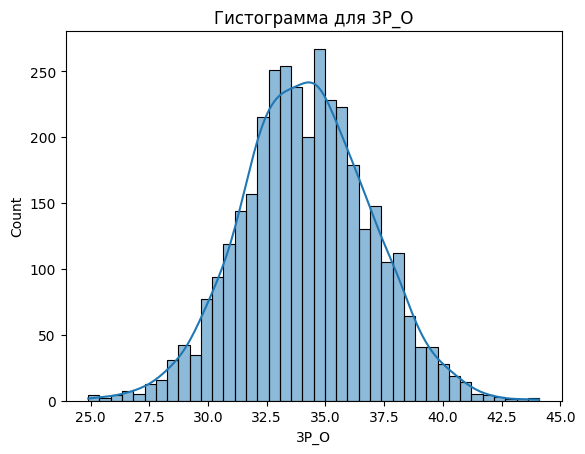

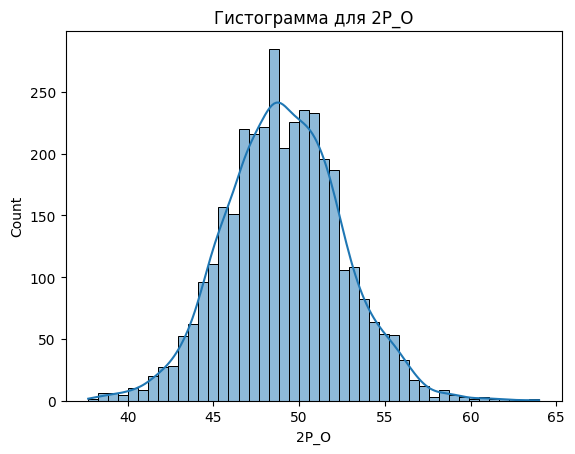

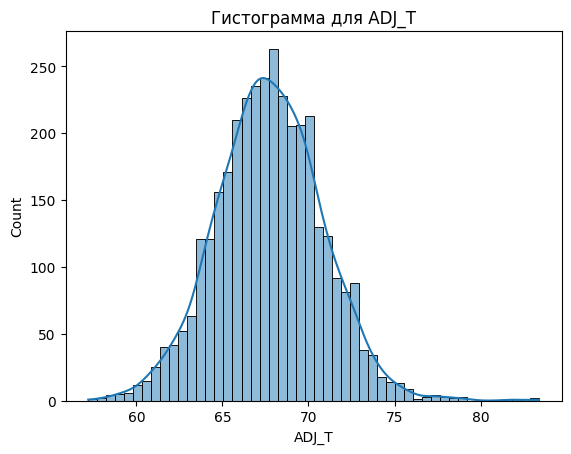

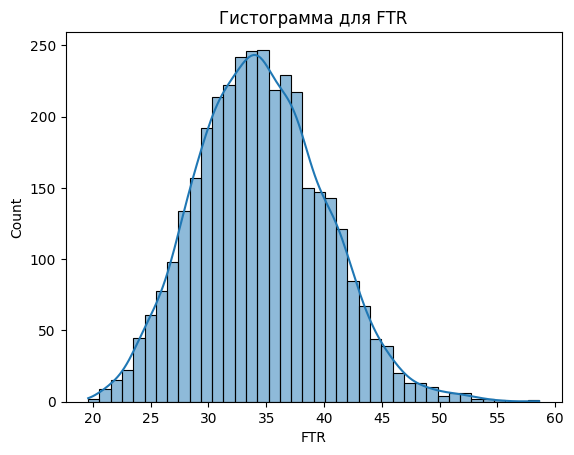

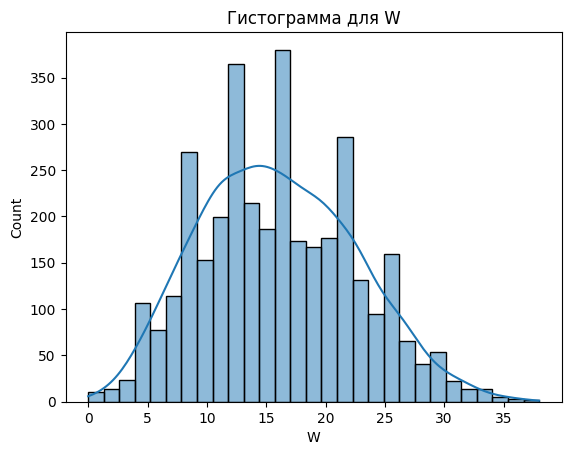

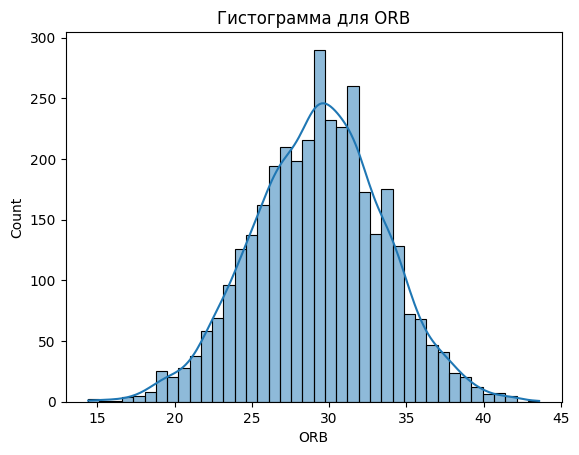

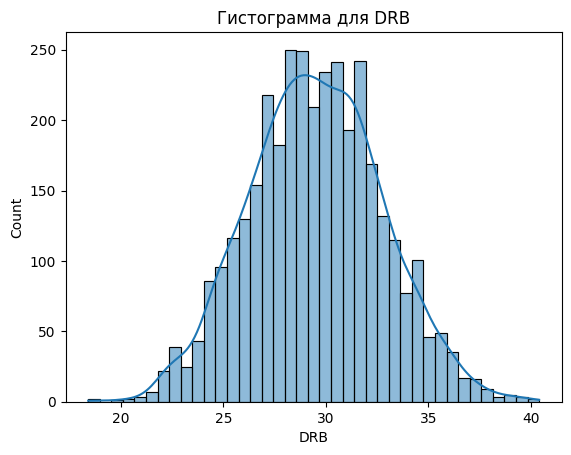

In [ ]:

    #Оценка атакующего потенциала
    sns.histplot(df['ADJOE'], kde = True)
    plt.title('Гистограмма для ADJOE')
    plt.show()

    # Оценка защищитногo потенциала
    sns.histplot(df['ADJDE'], kde=True)
    plt.title('Гистограмма для ADJDE')
    plt.show()

    # Количество потерь мяча команды
    sns.histplot(df['TOR'], kde=True)
    plt.title('Гистограмма для TOR')
    plt.show()

    # Процент попаданий трехочковых бросков команды
    sns.histplot(df['3P_O'], kde=True)
    plt.title('Гистограмма для 3P_O')
    plt.show()

    # Процент попаданий двухочковых бросков команды
    sns.histplot(df['2P_O'], kde=True)
    plt.title('Гистограмма для 2P_O')
    plt.show()


    #Среднее количество атак (темп игры) на 100 владений мячом
    sns.histplot(df['ADJ_T'], kde=True)
    plt.title('Гистограмма для ADJ_T')
    plt.show()

    #Процент попадания в штрафные броски команды
    sns.histplot(df['FTR'], kde=True)
    plt.title('Гистограмма для FTR')
    plt.show()

    #Количество побед команды в сезоне
    sns.histplot(df['W'], kde=True)
    plt.title('Гистограмма для W')
    plt.show()

    # процент подборов в нападении
    sns.histplot(df['ORB'], kde=True)
    plt.title('Гистограмма для ORB')
    plt.show()

    # процент подборов в защите
    sns.histplot(df['DRB'], kde=True)
    plt.title('Гистограмма для DRB')
    plt.show()

Корреляционная матрица

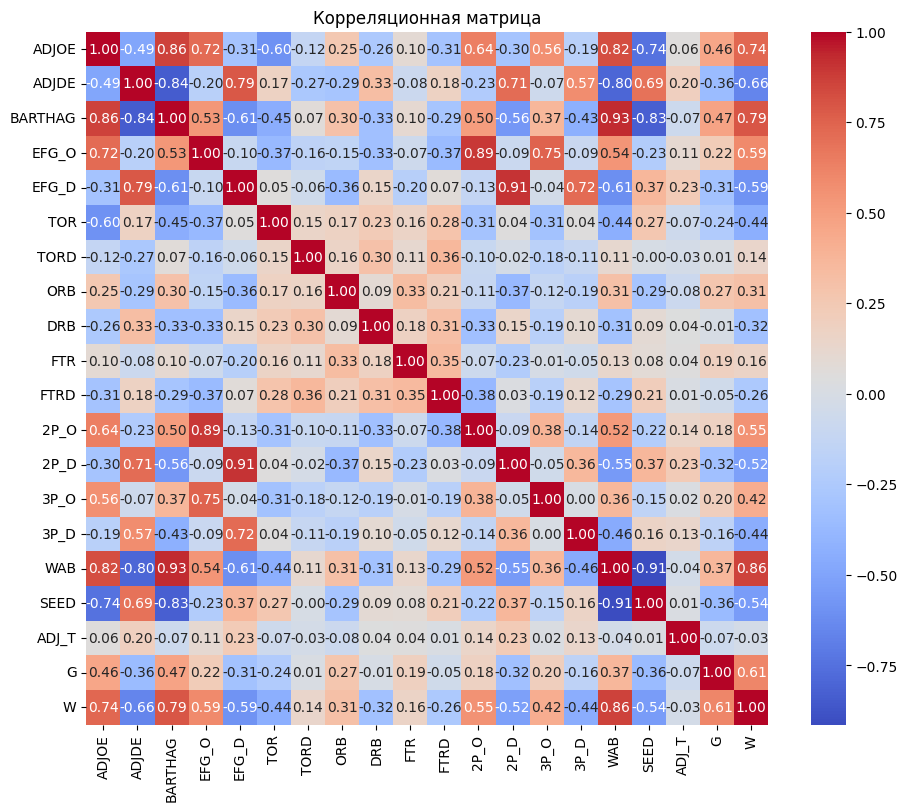

In [ ]:
    plt.figure(figsize=(11, 9))
    sns.heatmap(df[['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'WAB', 'SEED', 'ADJ_T', 'G', 'W']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Корреляционная матрица")
    plt.show()

Сбор данных в один файл

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Appalachian St..xlsx to Appalachian St..xlsx
Saving Arizona.xlsx to Arizona.xlsx
Saving Arkansas Pine Bluff.xlsx to Arkansas Pine Bluff.xlsx
Saving Arkansas St..xlsx to Arkansas St..xlsx
Saving Army.xlsx to Army.xlsx
Saving Bradley.xlsx to Bradley.xlsx
Saving Bryant.xlsx to Bryant.xlsx
Saving Buffalo.xlsx to Buffalo.xlsx
Saving Cal Poly.xlsx to Cal Poly.xlsx
Saving Cal St. Bakersfield.xlsx to Cal St. Bakersfield.xlsx
Saving cbb.csv to cbb (1).csv
Saving Central Connecticut.xlsx to Central Connecticut.xlsx
Saving Charleston Southern.xlsx to Charleston Southern.xlsx
Saving Cleveland St..xlsx to Cleveland St..xlsx
Saving Colgate.xlsx to Colgate.xlsx
Saving Cornell.xlsx to Cornell.xlsx
Saving Creighton.xlsx to Creighton.xlsx
Saving Delaware.xlsx to Delaware.xlsx
Saving Drexel.xlsx to Drexel.xlsx
Saving Duke.xlsx to Duke.xlsx
Saving Fairfield.xlsx to Fairfield.xlsx
Saving FIU.xlsx to FIU.xlsx
Saving Florida.xlsx to Florida.xlsx
Saving Georgetown.xlsx to Georgetown.xlsx
Saving Georgia

In [ ]:
from google.colab import files

# Признаки, которые используем
signs = ['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
         'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD',
         '2P_O', '2P_D', '3P_O', '3P_D',
         'WAB', 'SEED', 'ADJ_T','POSTSEASON']

# Список команд
teams = ["Louisville", "Florida", "Indiana", "Gonzaga", "Syracuse", "Michigan", "Kansas", "Duke", "Ohio St.", "Wisconsin", "Michigan St.", "Georgetown", "Arizona", "VCU", "Pittsburgh", "Miami FL", "Saint Louis", "Creighton", "Wichita St.", "Minnesota", "Marquette", "Oklahoma St.", "Iowa", "Saint Mary's", "North Carolina", "Kansas St.", "Missouri", "Iowa St.", "Virginia", "UNLV", "Yale", "Illinois Chicago", "Northeastern", "Wagner", "FIU", "LIU", "Cal St. Bakersfield", "Maine", "Central Connecticut", "Appalachian St.", "Portland", "TCU", "Texas St.", "North Dakota", "Old Dominion", "Colgate", "Cornell", "Liberty", "Mississippi St.", "NJIT", "Wofford", "Winthrop", "Cleveland St.", "UTSA", "Arkansas Pine Bluff", "Troy", "South Dakota", "Arkansas St.", "Murray St.", "Virginia Tech", "Army", "UC Irvine", "Bradley", "Fairfield", "Houston", "Towson", "Rhode Island", "UT Arlington", "Drexel", "North Carolina Central", "Western Michigan", "Delaware", "Western Kentucky", "Montana", "Charleston Southern", "Bryant", "Youngstown St.", "Rider"] # отсюда по факту надо w/l

# Загружаем общие данные
df = pd.read_csv('cbb.csv')  # отсюда брать все данные
df_2013 = df[df['YEAR'] == 2013].copy()  # данные за 2013 год

# Итоговый датафрейм где будет все храниться
df_res = pd.DataFrame()
seen_matches = set()  # хранит пары команд

for current_team in teams:
    try:
        df_current = pd.read_excel(f"{current_team}.xlsx")
    except FileNotFoundError:
        print(f"Файл не найден: {current_team}.xlsx")
        continue

    opponents = df_current['opponent']

    for opp in opponents:
        match_key = tuple(sorted([current_team, opp]))
        if match_key in seen_matches:
            continue
        seen_matches.add(match_key)

        # Проверяем наличие обеих команд в df_2013
        team_in_2013 = df_2013['TEAM'].isin([current_team]).any()
        opp_in_2013 = df_2013['TEAM'].isin([opp]).any()

        if team_in_2013 and opp_in_2013:
            try:
                # Данные для current_team - A
                team_data = df_2013.query(f'TEAM == "{current_team}"')
                # Данные для opp - B
                opp_data = df_2013.query(f'TEAM == "{opp}"')

                # Создаем новую строку(словарь)
                new_row = {f'A_{s}': team_data[s].iloc[0] for s in signs}
                new_row.update({f'B_{s}': opp_data[s].iloc[0] for s in signs})

                # Добавляем результат
                result = df_current.query(f'opponent == "{opp}"')['W'].iloc[0]
                new_row['result'] = result

                df_res = pd.concat([df_res, pd.DataFrame([new_row])], ignore_index=True)
            except IndexError:
                print(f"Ошибка данных для матча: {current_team} vs {opp}")
                continue
        else:
            print(f"Одна из команд не найдена в 2013 данных: {current_team} или {opp}")
            continue

# Сохраняем результат
df_res.to_csv('res.csv', index=False)
files.download('res.csv')

Предобработка данных

In [ ]:
uploaded = files.upload()
data = pd.read_csv('res (3).csv')

Saving res (3).csv to res (3) (1).csv


In [ ]:
data.info()

# Настройка pandas для отображения всех столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  # Для отображения всех строк

data.isnull().sum() # количество пропузенных занчений


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A_ADJOE       1526 non-null   float64
 1   A_ADJDE       1526 non-null   float64
 2   A_BARTHAG     1526 non-null   float64
 3   A_EFG_O       1526 non-null   float64
 4   A_EFG_D       1526 non-null   float64
 5   A_TOR         1526 non-null   float64
 6   A_TORD        1526 non-null   float64
 7   A_ORB         1526 non-null   float64
 8   A_DRB         1526 non-null   float64
 9   A_FTR         1526 non-null   float64
 10  A_FTRD        1526 non-null   float64
 11  A_2P_O        1526 non-null   float64
 12  A_2P_D        1526 non-null   float64
 13  A_3P_O        1526 non-null   float64
 14  A_3P_D        1526 non-null   float64
 15  A_WAB         1526 non-null   float64
 16  A_SEED        695 non-null    float64
 17  A_ADJ_T       1526 non-null   float64
 18  A_POSTSEASON  695 non-null  

,0
A_ADJOE,0
A_ADJDE,0
A_BARTHAG,0
A_EFG_O,0
A_EFG_D,0
A_TOR,0
A_TORD,0
A_ORB,0
A_DRB,0
A_FTR,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Заполним пустые значения в столбцах POSTSEASON на 'NA'
data['A_POSTSEASON'] = data['A_POSTSEASON'].fillna('NA')
data['B_POSTSEASON'] = data['B_POSTSEASON'].fillna('NA')

# Заполним пропуски в столбцах SEED на медиану
data['A_SEED'] = data['A_SEED'].fillna(data['A_SEED'].median())
data['B_SEED'] = data['B_SEED'].fillna(data['B_SEED'].median())

#data.to_csv('result_file.csv', index = False)
#files.download('result_file.csv')

In [ ]:
def find_object(data):
    global object_columns
    object_columns = data.select_dtypes(include='object').columns.tolist()


In [ ]:
def fit_encoder(data):
    enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    enc.fit(data)
    return enc

In [ ]:
def transform_data(data, encoder):
    encoded = encoder.transform(data[object_columns])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(object_columns), index=data.index)
    data_encoded = pd.concat([data.drop(columns=object_columns), encoded_df], axis=1)
    return data_encoded

Построение случайного леса

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Загрузка данных
X = data.drop(['result'], axis = 1)
y = data['result']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

find_object(X_train)
# Создаём и обучаем энкодер
encoder = fit_encoder(X_train[object_columns])

# Преобразуем данные
X_train_encoded = transform_data(X_train, encoder)
X_test_encoded = transform_data(X_test, encoder)

  # Случайный лес
rf = RandomForestClassifier(
      max_depth=5,      # Глубина не ограничена
      min_samples_leaf=1,  # Минимум 1 объект в листе
      n_estimators=200,    # Количество деревьев
      max_features='sqrt',
      class_weight='balanced',
      bootstrap=True,
      n_jobs=-1           # Использует все ядра процессора
  )

rf.fit(X_train_encoded, y_train)
# Оценка
print(f'Forest accuracy: {rf.score(X_test_encoded, y_test)}')




Forest accuracy: 0.7450980392156863


[[ 95  32]
 [ 46 133]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       127
           1       0.81      0.74      0.77       179

    accuracy                           0.75       306
   macro avg       0.74      0.75      0.74       306
weighted avg       0.75      0.75      0.75       306



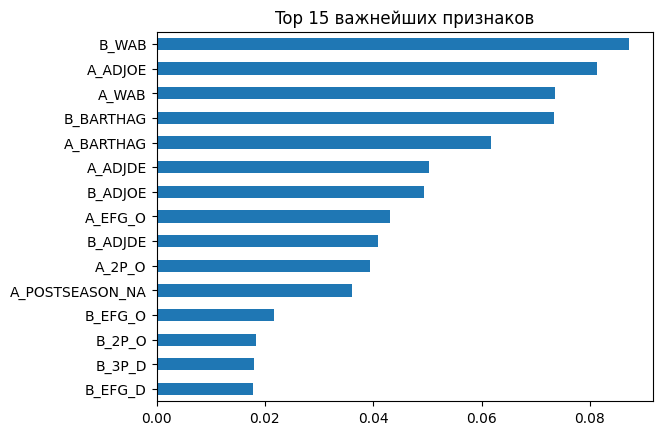

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = pd.Series(rf.feature_importances_, index=X_train_encoded.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 важнейших признаков')
plt.gca().invert_yaxis()
plt.show()
